In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,make_scorer
from sklearn.svm import SVR
import time
import optuna

In [2]:
data =  pd.read_csv("D:\Kuliah\Praktikum Komputasi Statistika 2\Responsi\Wage.csv")

In [3]:
# Check data
data

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


In [4]:
# Check data type each column
data.dtypes

year            int64
age             int64
maritl         object
race           object
education      object
region         object
jobclass       object
health         object
health_ins     object
logwage       float64
wage          float64
dtype: object

# Pengecekan Missing Value

In [5]:
# Check Missing value 
data.isnull().sum()

year          0
age           0
maritl        0
race          0
education     0
region        0
jobclass      0
health        0
health_ins    0
logwage       0
wage          0
dtype: int64

<AxesSubplot:>

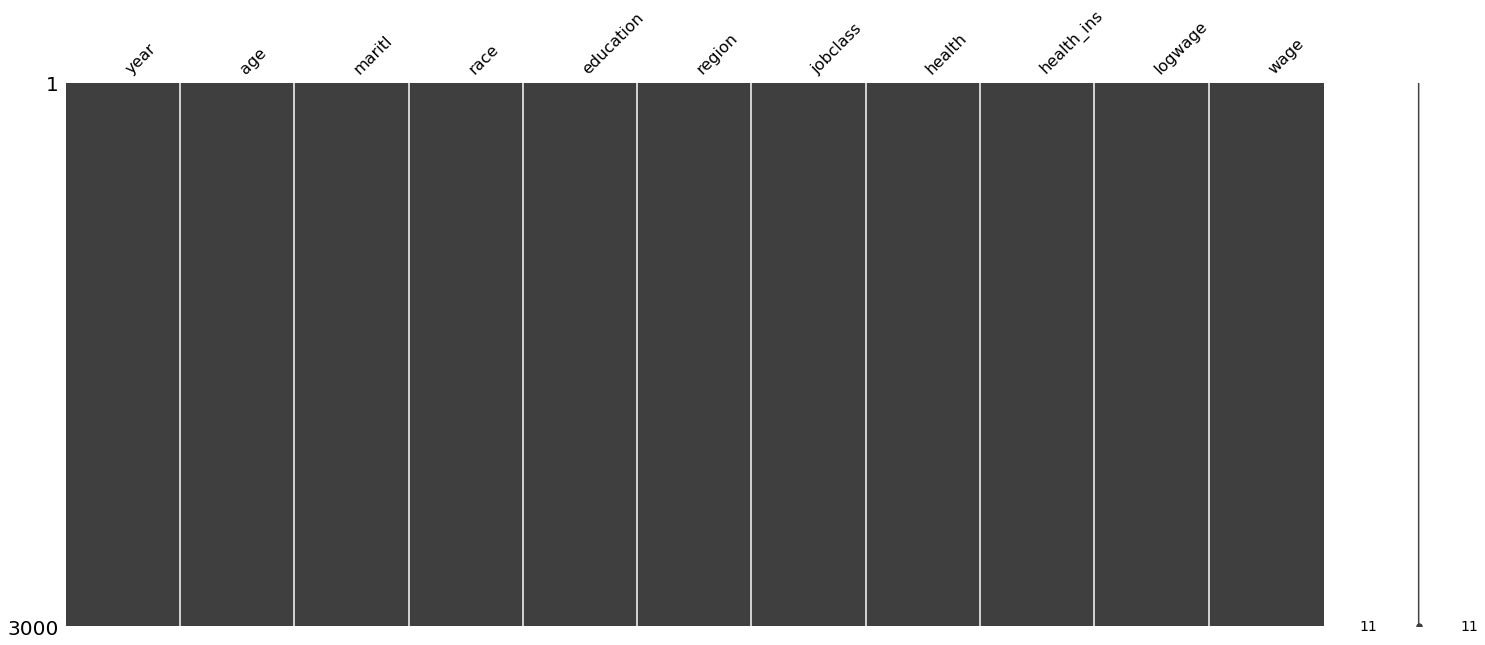

In [6]:
msno.matrix(data)

In [7]:
# Drop Logwage column
DROP = ["logwage"]
data = data.drop(columns=DROP)
data

,year,age,maritl,race,education,region,jobclass,health,health_ins,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,75.043154
...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,154.685293
2996,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,99.689464
2997,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,66.229408
2998,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,87.981033


# Statistik Deskriptif

In [8]:
data["year"].value_counts()

2003    513
2004    485
2005    447
2006    392
2009    389
2008    388
2007    386
Name: year, dtype: int64

In [9]:
data["age"].describe()

count    3000.000000
mean       42.414667
std        11.542406
min        18.000000
25%        33.750000
50%        42.000000
75%        51.000000
max        80.000000
Name: age, dtype: float64

In [10]:
data["wage"].describe()

count    3000.000000
mean      111.703608
std        41.728595
min        20.085537
25%        85.383940
50%       104.921507
75%       128.680488
max       318.342430
Name: wage, dtype: float64

In [11]:
data["maritl"].value_counts()

2. Married          2074
1. Never Married     648
4. Divorced          204
5. Separated          55
3. Widowed            19
Name: maritl, dtype: int64

In [12]:
data["race"].value_counts()

1. White    2480
2. Black     293
3. Asian     190
4. Other      37
Name: race, dtype: int64

In [13]:
data["education"].value_counts()

2. HS Grad            971
4. College Grad       685
3. Some College       650
5. Advanced Degree    426
1. < HS Grad          268
Name: education, dtype: int64

In [14]:
data["region"].value_counts()

2. Middle Atlantic    3000
Name: region, dtype: int64

In [15]:
data["health"].value_counts()

2. >=Very Good    2142
1. <=Good          858
Name: health, dtype: int64

In [16]:
data["health_ins"].value_counts()

1. Yes    2083
2. No      917
Name: health_ins, dtype: int64

# Visualisasi data

<AxesSubplot:title={'center':'Barplot Marital Status'}>

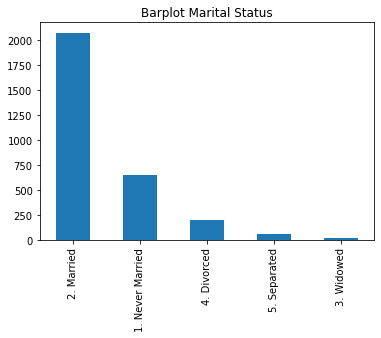

In [17]:
# Plot data maritl status
data["maritl"].value_counts().plot(kind='bar',title="Barplot Marital Status")

<AxesSubplot:title={'center':'Barplot Race'}>

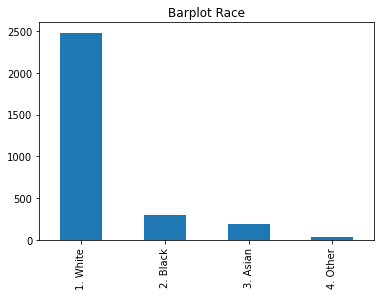

In [18]:
# Plot Race
data["race"].value_counts().plot(kind='bar',title="Barplot Race")

<AxesSubplot:title={'center':'Barplot Education'}>

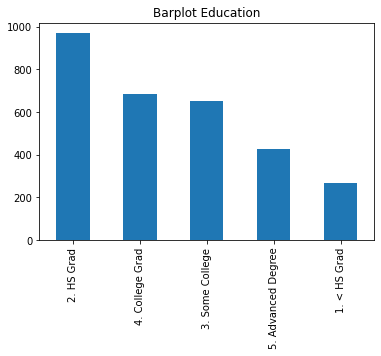

In [19]:
# Plot Education
data["education"].value_counts().plot(kind='bar',title="Barplot Education")

<AxesSubplot:title={'center':'Barplot Region'}>

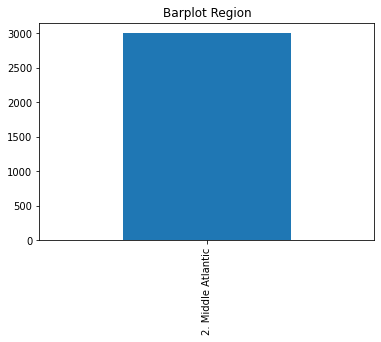

In [20]:
# Plot Region
data["region"].value_counts().plot(kind='bar',title="Barplot Region")

<AxesSubplot:title={'center':'Barplot Health'}>

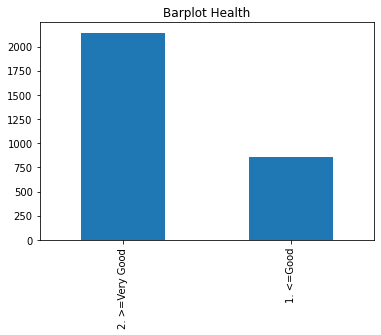

In [21]:
# Plot Health
data["health"].value_counts().plot(kind='bar',title="Barplot Health")

<AxesSubplot:title={'center':'Barplot Health_ins'}>

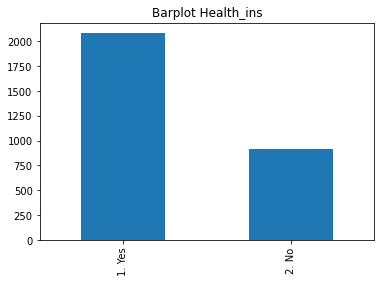

In [22]:
# Plot health_ins
data["health_ins"].value_counts().plot(kind='bar',title="Barplot Health_ins")

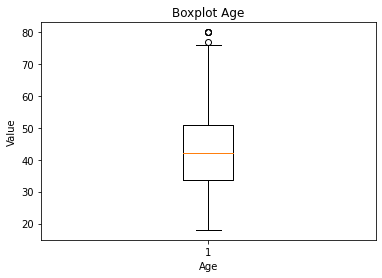

In [23]:
# Boxplot age
plt.boxplot(data["age"])
plt.xlabel("Age")
plt.ylabel("Value")
plt.title("Boxplot Age")
plt.show()

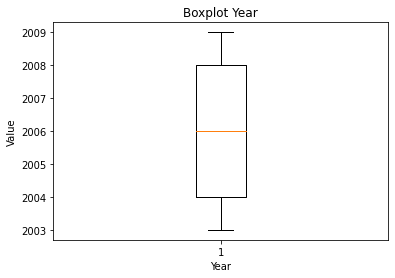

In [24]:
# Boxplot Wage
plt.boxplot(data["year"])
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Boxplot Year")
plt.show()

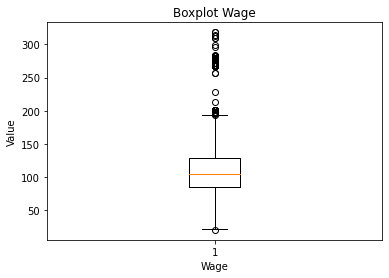

In [25]:
# Boxplot Wage
plt.boxplot(data["wage"])
plt.xlabel("Wage")
plt.ylabel("Value")
plt.title("Boxplot Wage")
plt.show()

# Pre Built Pipeline

In [26]:
SEED = 1234
TARGET = "wage"
FEATURES = data.columns.drop(TARGET)

NUMERICAL = data[FEATURES].select_dtypes('number').columns
print(f"Numerical features: {', '.join(NUMERICAL)}")

CATEGORICAL = pd.Index(np.setdiff1d(FEATURES, NUMERICAL))
print(f"Categorical features: {', '.join(CATEGORICAL)}")

Numerical features: year, age
Categorical features: education, health, health_ins, jobclass, maritl, race, region


In [27]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=TARGET), data[TARGET], 
                                                    test_size=.25, random_state=SEED)

# Tanpa Hyperparameter Tunning

In [28]:
def exec_time(start, end):
   diff_time = end - start
   m, s = divmod(diff_time, 60)
   h, m = divmod(m, 60)
   s,m,h = int(round(s, 0)), int(round(m, 0)), int(round(h, 0))
   return f"{h}:{m}:{s}"

In [29]:
X_train_numerical = X_train[NUMERICAL]
X_test_numerical = X_test[NUMERICAL]

In [30]:
X_train_Categorical = X_train[CATEGORICAL]
X_test_Categorical = X_test[CATEGORICAL]

In [31]:
X_train_Categorical_encoded = pd.get_dummies(X_train_Categorical, drop_first=True)
X_test_Categorical_encoded = pd.get_dummies(X_test_Categorical, drop_first=True)

In [32]:
X_train_preprocessed = X_train_numerical.join(X_train_Categorical_encoded)
X_test_preprocessed = X_test_numerical.join(X_test_Categorical_encoded)

# Evaluasi tanpa hyperparameter tunning

## RandomForestRegressor

In [33]:
Rf_model = RandomForestRegressor(random_state=SEED)

In [34]:
start_base = time.time()
Rf_model.fit(X_train_preprocessed,y_train)
end_base = time.time()

In [35]:
basemodel_time = exec_time(start_base,end_base)
basemodel_time

'0:0:2'

In [36]:
pred = Rf_model.predict(X_train_preprocessed)
print("MAE:",mean_absolute_error(y_train,pred))

MAE: 10.770851354199845


In [37]:
y_pred=Rf_model.predict(X_test_preprocessed)
print("MAE:",mean_absolute_error(y_test,y_pred))

MAE: 25.38263742350846


In [49]:
Rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

## SVR

In [39]:
SVR_Model=SVR()

In [40]:
start_base = time.time()
SVR_Model.fit(X_train_preprocessed,y_train)
end_base = time.time()

In [41]:
pred = SVR_Model.predict(X_train_preprocessed)
print("MAE:",mean_absolute_error(y_train,pred))

MAE: 29.299509577666086


In [42]:
y_pred=SVR_Model.predict(X_test_preprocessed)
print("MAE:",mean_absolute_error(y_test,y_pred))

MAE: 28.464927464791835


In [50]:
SVR_Model.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# Dengan Hyperparameter Tunning

In [44]:
def objective(trial):
    numerical_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', MinMaxScaler())
    ])

    categorical_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
    ])

    transformer = ColumnTransformer(transformers=[
        ('num', numerical_pipe, NUMERICAL),
        ('cat', categorical_pipe, CATEGORICAL)
    ])

    classifier =trial.suggest_categorical('classifier',['SVR','RandomForestRegressor'])
    if classifier == 'RandomForestRegressor':
        bootstrap = trial.suggest_categorical('bootstrap',[True,False])
        ccp_alpha = trial.suggest_int('ccp',0.2,0.9)
        max_depth = trial.suggest_int('max_depth',10,100)
        max_features = trial.suggest_categorical("max_features",["auto","sqrt"])
        n_estimators = trial.suggest_int(' n_estimators',10,200)
        min_samples_split = trial.suggest_int("min_samples_split",2,20)
        
        clf = RandomForestRegressor(bootstrap=bootstrap,ccp_alpha=ccp_alpha,max_depth=max_depth,
                                   max_features=max_features,n_estimators=n_estimators,
                                    min_samples_split=min_samples_split,random_state=SEED)
        
    elif classifier == 'SVR':
        kernel=trial.suggest_categorical('kernel',['rbf','poly','linear','sigmoid'])
        c=trial.suggest_float("C",1,3.0,log=True)
        gamma=trial.suggest_categorical('gamma',['auto','scale'])
        degree=trial.suggest_int("degree",1,3)
        
        clf = SVR(kernel=kernel,C=c,gamma=gamma,degree=degree)
        
    model = Pipeline(steps=[('transformer',transformer),
                           ('classifier',clf)])
    
    my_scorer = make_scorer(mean_absolute_error)
    
    return cross_val_score(model,X_train,y_train, n_jobs=-1,cv=5,scoring=my_scorer).mean()

In [45]:
study = optuna.create_study(direction="minimize")
study.optimize(objective,timeout=120)

trial = study.best_trial
print('MAE:{}'.format(trial.value))
print('Best Hyperparameters:{}'.format(trial.params))

[I 2022-06-02 16:13:14,811] A new study created in memory with name: no-name-015a0b2b-66bc-4c0f-8bfb-ffe8f8e6e40f
C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.2, 0.9] and step=1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.2].
  warnings.warn(
[I 2022-06-02 16:13:20,623] Trial 0 finished with value: 23.82069471029214 and parameters: {'classifier': 'RandomForestRegressor', 'bootstrap': True, 'ccp': 0, 'max_depth': 92, 'max_features': 'auto', ' n_estimators': 191, 'min_samples_split': 18}. Best is trial 0 with value: 23.82069471029214.
[I 2022-06-02 16:13:21,636] Trial 1 finished with value: 24.988682792686756 and parameters: {'classifier': 'SVR', 'kernel': 'sigmoid', 'C': 1.0736870880773455, 'gamma': 'auto', 'degree': 2}. Best is trial 0 with value: 23.82069471029214.
[I 2022-06-02 16:13:22,491] Trial 2 finished with value: 22.958938368290692 and par

C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.2, 0.9] and step=1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.2].
  warnings.warn(
[I 2022-06-02 16:13:36,003] Trial 26 finished with value: 24.242215568386804 and parameters: {'classifier': 'RandomForestRegressor', 'bootstrap': True, 'ccp': 0, 'max_depth': 56, 'max_features': 'auto', ' n_estimators': 198, 'min_samples_split': 12}. Best is trial 16 with value: 22.918137451128256.
[I 2022-06-02 16:13:36,309] Trial 27 finished with value: 23.114610582853413 and parameters: {'classifier': 'SVR', 'kernel': 'rbf', 'C': 1.9362157829033857, 'gamma': 'scale', 'degree': 1}. Best is trial 16 with value: 22.918137451128256.
[I 2022-06-02 16:13:36,631] Trial 28 finished with value: 22.919833757439903 and parameters: {'classifier': 'SVR', 'kernel': 'rbf', 'C': 2.958035170142947, 'gamma': 'scale', 'degree': 1}. Best 

C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.2, 0.9] and step=1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.2].
  warnings.warn(
[I 2022-06-02 16:13:48,052] Trial 55 finished with value: 23.923018349950148 and parameters: {'classifier': 'RandomForestRegressor', 'bootstrap': True, 'ccp': 0, 'max_depth': 76, 'max_features': 'sqrt', ' n_estimators': 55, 'min_samples_split': 8}. Best is trial 51 with value: 22.914834105609394.
[I 2022-06-02 16:13:48,368] Trial 56 finished with value: 22.949075027987202 and parameters: {'classifier': 'SVR', 'kernel': 'rbf', 'C': 2.7430070233726096, 'gamma': 'scale', 'degree': 1}. Best is trial 51 with value: 22.914834105609394.
[I 2022-06-02 16:13:48,568] Trial 57 finished with value: 23.185631239300385 and parameters: {'classifier': 'SVR', 'kernel': 'poly', 'C': 1.5848766494429225, 'gamma': 'scale', 'degree': 1}. Best 

[I 2022-06-02 16:14:04,973] Trial 84 finished with value: 22.860632878466184 and parameters: {'classifier': 'SVR', 'kernel': 'poly', 'C': 2.0261683649938163, 'gamma': 'scale', 'degree': 3}. Best is trial 80 with value: 22.858799132111205.
[I 2022-06-02 16:14:05,192] Trial 85 finished with value: 22.860534584553683 and parameters: {'classifier': 'SVR', 'kernel': 'poly', 'C': 2.0286831258587537, 'gamma': 'scale', 'degree': 3}. Best is trial 80 with value: 22.858799132111205.
[I 2022-06-02 16:14:05,409] Trial 86 finished with value: 22.859940085791077 and parameters: {'classifier': 'SVR', 'kernel': 'poly', 'C': 2.0422389446825107, 'gamma': 'scale', 'degree': 3}. Best is trial 80 with value: 22.858799132111205.
[I 2022-06-02 16:14:05,633] Trial 87 finished with value: 27.40109860313246 and parameters: {'classifier': 'SVR', 'kernel': 'poly', 'C': 2.0171926725239753, 'gamma': 'auto', 'degree': 3}. Best is trial 80 with value: 22.858799132111205.
[I 2022-06-02 16:14:05,873] Trial 88 finished 

[I 2022-06-02 16:14:15,816] Trial 116 finished with value: 22.848064531061823 and parameters: {'classifier': 'SVR', 'kernel': 'poly', 'C': 2.3120682605950877, 'gamma': 'scale', 'degree': 3}. Best is trial 113 with value: 22.847640525367154.
[I 2022-06-02 16:14:16,045] Trial 117 finished with value: 22.847825351239397 and parameters: {'classifier': 'SVR', 'kernel': 'poly', 'C': 2.320064597657265, 'gamma': 'scale', 'degree': 3}. Best is trial 113 with value: 22.847640525367154.
C:\Users\Hasan Zein\AppData\Local\Programs\Python\Python39\lib\site-packages\optuna\distributions.py:560: UserWarning: The distribution is specified by [0.2, 0.9] and step=1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.2].
  warnings.warn(
[I 2022-06-02 16:14:19,058] Trial 118 finished with value: 25.47868906876175 and parameters: {'classifier': 'RandomForestRegressor', 'bootstrap': True, 'ccp': 0, 'max_depth': 72, 'max_features': 'auto', ' n_estimators': 119, 'min_samples_split': 5}. 

[I 2022-06-02 16:14:26,034] Trial 146 finished with value: 28.60253393067603 and parameters: {'classifier': 'SVR', 'kernel': 'sigmoid', 'C': 2.4763696032652076, 'gamma': 'scale', 'degree': 3}. Best is trial 142 with value: 22.84336695369945.
[I 2022-06-02 16:14:26,246] Trial 147 finished with value: 22.843095535424414 and parameters: {'classifier': 'SVR', 'kernel': 'poly', 'C': 2.5381571726848424, 'gamma': 'scale', 'degree': 3}. Best is trial 147 with value: 22.843095535424414.
[I 2022-06-02 16:14:26,462] Trial 148 finished with value: 22.84318953047359 and parameters: {'classifier': 'SVR', 'kernel': 'poly', 'C': 2.534127430013323, 'gamma': 'scale', 'degree': 3}. Best is trial 147 with value: 22.843095535424414.
[I 2022-06-02 16:14:26,698] Trial 149 finished with value: 22.8434500840322 and parameters: {'classifier': 'SVR', 'kernel': 'poly', 'C': 2.523398797515276, 'gamma': 'scale', 'degree': 3}. Best is trial 147 with value: 22.843095535424414.
[I 2022-06-02 16:14:26,923] Trial 150 fi

[I 2022-06-02 16:14:32,992] Trial 178 finished with value: 22.840970580651923 and parameters: {'classifier': 'SVR', 'kernel': 'poly', 'C': 2.7521213777742806, 'gamma': 'scale', 'degree': 2}. Best is trial 161 with value: 22.839785048488153.
[I 2022-06-02 16:14:33,211] Trial 179 finished with value: 22.840069189953038 and parameters: {'classifier': 'SVR', 'kernel': 'poly', 'C': 2.6793503120288165, 'gamma': 'scale', 'degree': 2}. Best is trial 161 with value: 22.839785048488153.
[I 2022-06-02 16:14:33,449] Trial 180 finished with value: 24.902089353279557 and parameters: {'classifier': 'SVR', 'kernel': 'poly', 'C': 2.697247475408624, 'gamma': 'auto', 'degree': 2}. Best is trial 161 with value: 22.839785048488153.
[I 2022-06-02 16:14:33,670] Trial 181 finished with value: 22.840231532714903 and parameters: {'classifier': 'SVR', 'kernel': 'poly', 'C': 2.6598148413042897, 'gamma': 'scale', 'degree': 2}. Best is trial 161 with value: 22.839785048488153.
[I 2022-06-02 16:14:33,896] Trial 182 

[I 2022-06-02 16:14:42,141] Trial 210 finished with value: 22.839845422246658 and parameters: {'classifier': 'SVR', 'kernel': 'poly', 'C': 2.599295749334806, 'gamma': 'scale', 'degree': 2}. Best is trial 161 with value: 22.839785048488153.
[I 2022-06-02 16:14:42,361] Trial 211 finished with value: 22.908536763492428 and parameters: {'classifier': 'SVR', 'kernel': 'poly', 'C': 1.3891960500418754, 'gamma': 'scale', 'degree': 2}. Best is trial 161 with value: 22.839785048488153.
[I 2022-06-02 16:14:42,591] Trial 212 finished with value: 22.83981735887558 and parameters: {'classifier': 'SVR', 'kernel': 'poly', 'C': 2.591699667040055, 'gamma': 'scale', 'degree': 2}. Best is trial 161 with value: 22.839785048488153.
[I 2022-06-02 16:14:42,800] Trial 213 finished with value: 22.83982796601718 and parameters: {'classifier': 'SVR', 'kernel': 'poly', 'C': 2.5945435083165895, 'gamma': 'scale', 'degree': 2}. Best is trial 161 with value: 22.839785048488153.
[I 2022-06-02 16:14:43,016] Trial 214 fi

[I 2022-06-02 16:14:51,645] Trial 242 finished with value: 22.83975180166564 and parameters: {'classifier': 'SVR', 'kernel': 'poly', 'C': 2.5414497105466727, 'gamma': 'scale', 'degree': 2}. Best is trial 237 with value: 22.8396874240432.
[I 2022-06-02 16:14:51,853] Trial 243 finished with value: 22.83977756414445 and parameters: {'classifier': 'SVR', 'kernel': 'poly', 'C': 2.514884475973901, 'gamma': 'scale', 'degree': 2}. Best is trial 237 with value: 22.8396874240432.
[I 2022-06-02 16:14:52,071] Trial 244 finished with value: 22.839726937931694 and parameters: {'classifier': 'SVR', 'kernel': 'poly', 'C': 2.533504933958604, 'gamma': 'scale', 'degree': 2}. Best is trial 237 with value: 22.8396874240432.
[I 2022-06-02 16:14:52,293] Trial 245 finished with value: 22.84002027540608 and parameters: {'classifier': 'SVR', 'kernel': 'poly', 'C': 2.4721708190430873, 'gamma': 'scale', 'degree': 2}. Best is trial 237 with value: 22.8396874240432.
[I 2022-06-02 16:14:52,492] Trial 246 finished wi

[I 2022-06-02 16:14:59,277] Trial 274 finished with value: 22.83966201256532 and parameters: {'classifier': 'SVR', 'kernel': 'poly', 'C': 2.4239793833318295, 'gamma': 'scale', 'degree': 2}. Best is trial 268 with value: 22.839583217540966.
[I 2022-06-02 16:14:59,483] Trial 275 finished with value: 25.070921410391907 and parameters: {'classifier': 'SVR', 'kernel': 'poly', 'C': 2.4186157813002964, 'gamma': 'auto', 'degree': 2}. Best is trial 268 with value: 22.839583217540966.
[I 2022-06-02 16:14:59,718] Trial 276 finished with value: 22.84082839399247 and parameters: {'classifier': 'SVR', 'kernel': 'poly', 'C': 2.3654111161491924, 'gamma': 'scale', 'degree': 2}. Best is trial 268 with value: 22.839583217540966.
[I 2022-06-02 16:14:59,922] Trial 277 finished with value: 22.83963268699266 and parameters: {'classifier': 'SVR', 'kernel': 'poly', 'C': 2.433047172977769, 'gamma': 'scale', 'degree': 2}. Best is trial 268 with value: 22.839583217540966.
[I 2022-06-02 16:15:00,131] Trial 278 fin

[I 2022-06-02 16:15:11,100] Trial 304 finished with value: 24.849015993596783 and parameters: {'classifier': 'RandomForestRegressor', 'bootstrap': False, 'ccp': 0, 'max_depth': 22, 'max_features': 'sqrt', ' n_estimators': 123, 'min_samples_split': 9}. Best is trial 268 with value: 22.839583217540966.
[I 2022-06-02 16:15:11,300] Trial 305 finished with value: 22.84089988165198 and parameters: {'classifier': 'SVR', 'kernel': 'poly', 'C': 2.351753581432221, 'gamma': 'scale', 'degree': 2}. Best is trial 268 with value: 22.839583217540966.
[I 2022-06-02 16:15:11,534] Trial 306 finished with value: 22.839609834222067 and parameters: {'classifier': 'SVR', 'kernel': 'poly', 'C': 2.434082910706892, 'gamma': 'scale', 'degree': 2}. Best is trial 268 with value: 22.839583217540966.
[I 2022-06-02 16:15:11,821] Trial 307 finished with value: 28.520981943704918 and parameters: {'classifier': 'SVR', 'kernel': 'sigmoid', 'C': 2.459723715628635, 'gamma': 'scale', 'degree': 2}. Best is trial 268 with val

MAE:22.839583217540966
Best Hyperparameters:{'classifier': 'SVR', 'kernel': 'poly', 'C': 2.438701970178043, 'gamma': 'scale', 'degree': 2}


In [46]:
print(trial.params)
param_dict=trial.params.copy()
del param_dict['classifier']

if trial.params['classifier']=='RandomForestRegressor':
    print("A")
    clf=RandomForestRegressor(**param_dict)
    
elif trial.params['classifier']=='SVR':
    print("B")
    clf=SVR(**param_dict)
    
numerical_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', MinMaxScaler())
    ])

categorical_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
    ])

transformer = ColumnTransformer(transformers=[
        ('num', numerical_pipe, NUMERICAL),
        ('cat', categorical_pipe, CATEGORICAL)
    ])

model = Pipeline(steps=[('transformer',transformer),
                           ('classifier',clf)])

{'classifier': 'SVR', 'kernel': 'poly', 'C': 2.438701970178043, 'gamma': 'scale', 'degree': 2}
B


In [47]:
model

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['year', 'age'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['education', 'health', 'health_ins', 'jobclass', 'maritl', 'race',
       'region'],
      dtype='object'))])),
                ('classifier',
                 SVR(C=2.438701970178043, degree=2, kernel='poly'))])

In [48]:
model.fit(X_train,y_train)
print("MAE Train:",mean_absolute_error(y_train,model.predict(X_train)))
print("MAE Test :",mean_absolute_error(y_test,model.predict(X_test)))

MAE Train: 22.286513694849557
MAE Test : 22.379027147794506
